In [2]:
import pandas as pd
import six
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/Mall_Customers.csv")

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc1bb50>,
      dtype=object)

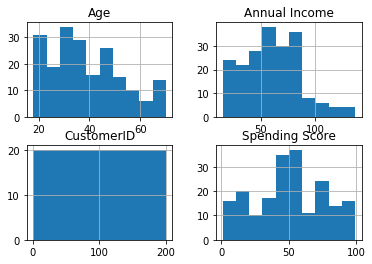

In [7]:
df.hist()

In [28]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, six.string_types) else x)
df.columns = cols

In [29]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


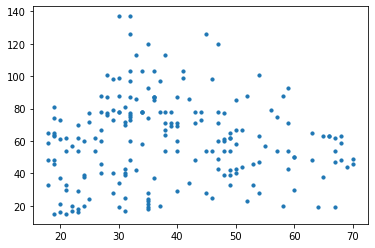

In [10]:
plt.scatter(df.Age, df.Annual_Income, s=10)

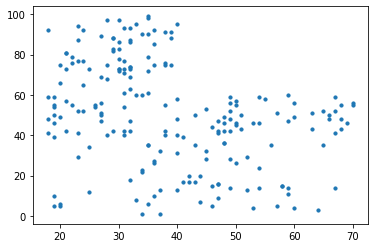

In [11]:
plt.scatter(df.Age, df.Spending_Score, s=10)

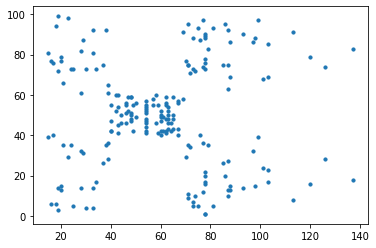

In [18]:
plt.scatter(df.Annual_Income, df.Spending_Score, s=10)

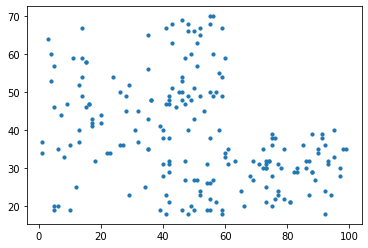

In [13]:
plt.scatter(df.Spending_Score, df.Age, s=10)

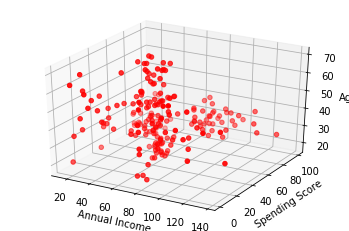

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Annual_Income, df.Spending_Score, df.Age, c='r', marker='o')

ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')

plt.show()

In [27]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [50]:
df_new = df[["Annual_Income","Spending_Score", "Age"]].astype(float) 

In [55]:
df_new.to_csv("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/Income_Spending.csv", mode='w', columns=["Annual_Income","Spending_Score"], sep=" ")

In [52]:
df_new.to_csv("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/Income_Spending_Age.csv", mode='w', columns=["Annual_Income","Spending_Score", "Age"], index=False, sep= " ")

In [56]:
sample = df_new.sample(5)
sample

,Annual_Income,Spending_Score,Age
126,71.0,35.0,43.0
4,17.0,40.0,31.0
87,57.0,55.0,22.0
121,67.0,40.0,38.0
99,61.0,49.0,20.0


In [57]:
sample.to_csv("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/centroids.csv", mode='w', sep =" ", columns=["Annual_Income","Spending_Score"])

In [58]:
from scipy.stats import zscore

In [84]:
col_list = ["Annual_Income","Spending_Score", "Age"]
df_z = df[col_list].apply(zscore)
df_z["Gender"] = df["Gender"]
df_z = pd.get_dummies(df_z)
df_z = df_z.rename(columns={'Gender_Male': 'Male', 'Gender_Female': 'Female'})
df_z[["Male", "Female"]] = df_z[["Female", "Male"]].astype(float) 


In [85]:
df_z

,Annual_Income,Spending_Score,Age,Female,Male
0,-1.738999,-0.434801,-1.424569,1.0,0.0
1,-1.738999,1.195704,-1.281035,1.0,0.0
2,-1.700830,-1.715913,-1.352802,0.0,1.0
3,-1.700830,1.040418,-1.137502,0.0,1.0
4,-1.662660,-0.395980,-0.563369,0.0,1.0
...,...,...,...,...,...
195,2.268791,1.118061,-0.276302,0.0,1.0
196,2.497807,-0.861839,0.441365,0.0,1.0
197,2.497807,0.923953,-0.491602,1.0,0.0
198,2.917671,-1.250054,-0.491602,1.0,0.0


In [86]:
df_z.to_csv("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/all.txt", mode='w', header=False, sep=" ")

In [87]:
sample_z = df_z.sample(3)
sample_z

,Annual_Income,Spending_Score,Age,Female,Male
44,-0.822933,-0.861839,0.728432,0.0,1.0
169,1.009200,0.496916,-0.491602,1.0,0.0
188,1.619911,-1.288876,0.154298,0.0,1.0


In [88]:
sample_z.to_csv("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/all_centroids.txt", mode='w', sep =" ", header=False)

In [104]:
cluster_list = []
point_list = []
with open("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/output.txt", 'r') as f:
    for line in f:
        splits = line.split(",")
        cluster_id = int(splits[0])
        cluster_coord = splits[1]
        cluster_count = int(float(splits[3].strip("\n")))
        cluster_list.append({"cluster_id" : cluster_id, "cluster_coord" : cluster_coord,
                             "cluster_count" : cluster_count})
        point_idx = splits[2].split(" ")
        for point in point_idx:
            point_list.append({"point_idx" : int(point), "cluster_id" : cluster_id})

    f.close()    

In [105]:
cluster_df = pd.DataFrame(cluster_list)
cluster_df

,cluster_id,cluster_coord,cluster_count
0,1,10 -0.5453866151086673 -0.4042988251243737 0.9...,70
1,2,199 0.01192185574982197 0.7860127058104888 -0....,94
2,3,182 1.0293446838089853 -1.266229905207772 0.10...,36


In [106]:
point_df = pd.DataFrame(point_list)
point_df

,point_idx,cluster_id
0,10,1
1,64,1
2,38,1
3,66,1
4,20,1
...,...,...
195,158,3
196,180,3
197,162,3
198,190,3


In [124]:
joined = pd.merge(df_z, point_df, left_index=True, right_on="point_idx")
joined = joined.drop(["point_idx"], 1)
joined

,Annual_Income,Spending_Score,Age,Female,Male,cluster_id
163,-1.738999,-0.434801,-1.424569,1.0,0.0,2
162,-1.738999,1.195704,-1.281035,1.0,0.0,2
62,-1.700830,-1.715913,-1.352802,0.0,1.0,1
161,-1.700830,1.040418,-1.137502,0.0,1.0,2
29,-1.662660,-0.395980,-0.563369,0.0,1.0,1
...,...,...,...,...,...,...
72,2.268791,1.118061,-0.276302,0.0,1.0,2
187,2.497807,-0.861839,0.441365,0.0,1.0,3
71,2.497807,0.923953,-0.491602,1.0,0.0,2
166,2.917671,-1.250054,-0.491602,1.0,0.0,3


In [125]:
joined.to_csv("/Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/labelled.txt", mode='w', sep =" ", header=False)

In [123]:
! sed 's/\(.*\) /\1,/' /Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/labelled.txt > /Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/labelled1.txt
! cp /Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/labelled1.txt /Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/labelled.txt
! rm /Users/sneha.shukla/work/personal/aditya_assignment/assignment2/datasets/labelled1.txt